# Pymaceuticals Inc.
---

### Analysis

-So far we can see that heavier mice tend to have larger tumors.  More analysis could be used to dive deeper into weather gender has any effect on tumor sizes or which drug regimen is the most effective.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mouse_data = pd.merge(study_results, mouse_metadata, on=["Mouse ID"])

# Display the data table for preview
combined_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
number_of_mice = combined_mouse_data["Mouse ID"].nunique()
number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_mouse_data[combined_mouse_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = combined_mouse_data[combined_mouse_data["Mouse ID"] != "g989"]
clean_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [5]:
# Checking the number of mice in the clean DataFrame.
number_of_mice2 = clean_mouse_data["Mouse ID"].nunique()
number_of_mice2

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median = clean_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
variance = clean_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
standard_deviation = clean_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem = clean_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
mouse_tumors = pd.DataFrame({"Mean Tumor Volume": mean,
                                    "Median Tumor Volume": median,
                                    "Tumor Volume Variance": variance,
                                    "Tumor Volume Std. Dev.": standard_deviation,
                                    "Tumor Volume Std. Err.": sem})

mouse_tumors

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
mouse_aggregation =  clean_mouse_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
mouse_aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

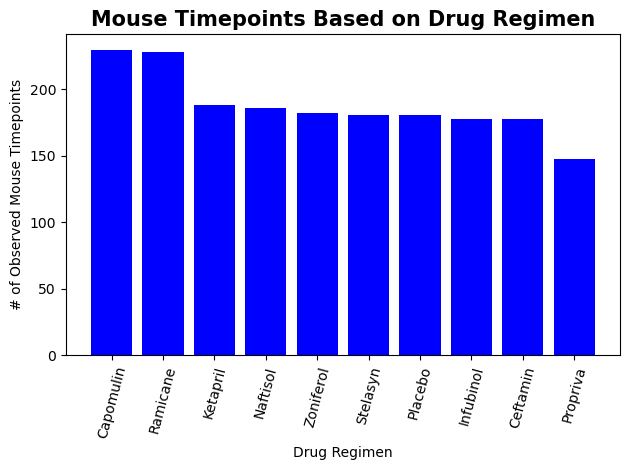

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#Used Xpert assistance to figure out how to rotate lables.

observed_mice = clean_mouse_data["Drug Regimen"].value_counts()

plt.bar(observed_mice.index, observed_mice, color='blue')
plt.title("Mouse Timepoints Based on Drug Regimen", fontsize=15, weight='bold')
plt.xlabel("Drug Regimen")
plt.xticks(rotation=75)
plt.ylabel("# of Observed Mouse Timepoints")
plt.tight_layout()

plt.show()

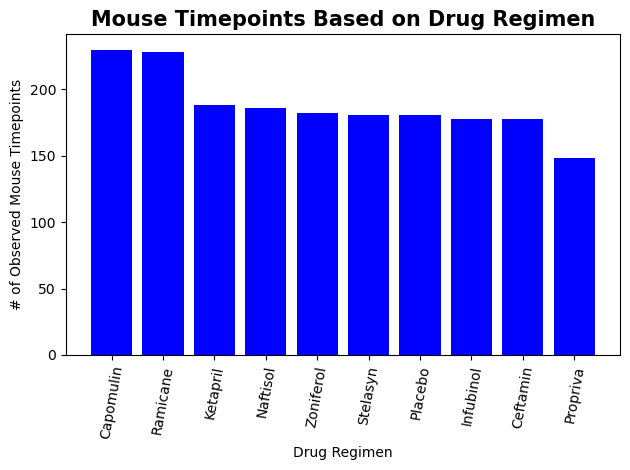

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = observed_mice.index.values
y_axis = observed_mice.values

plt.bar(x_axis, y_axis, color = 'blue')

plt.title("Mouse Timepoints Based on Drug Regimen", fontsize=15, weight='bold')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=80)
plt.tight_layout()

plt.show()

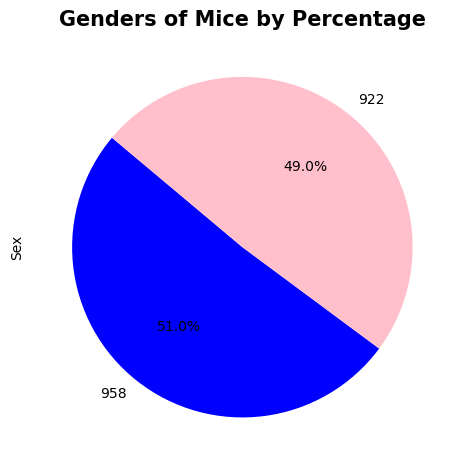

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mouse_sex = clean_mouse_data["Sex"].value_counts()

plt.pie(mouse_sex, labels=mouse_sex, colors=['blue', 'pink'], autopct='%1.1f%%', startangle=140)
plt.title("Genders of Mice by Percentage",fontsize=15, weight='bold')
plt.ylabel('Sex')
plt.tight_layout()

plt.show()

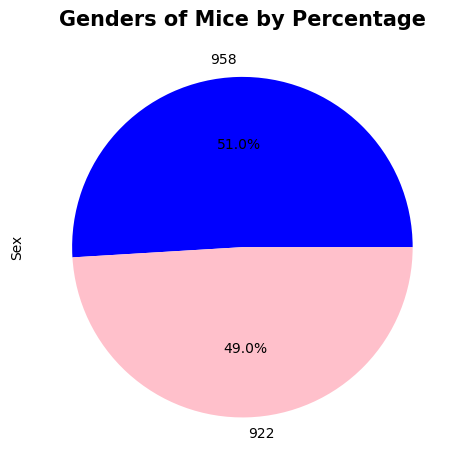

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mouse_sex = clean_mouse_data["Sex"].value_counts()

plt.title("Genders of Mice by Percentage",fontsize=15, weight='bold')
plt.pie(mouse_sex, labels=mouse_sex, colors= ['blue', 'pink'], autopct='%1.1f%%')
plt.ylabel('Sex')
plt.tight_layout()

plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
#I had a lot of difficulty during this section.  I was getting incorect results in the below graph.  Used Xpert assist and other AI tools to complete code.

# Find the last (greatest) timepoint for each mouse
max_timepoints = clean_mouse_data.groupby('Mouse ID')['Timepoint'].max()

# Filter the data for the specified treatments
specified_treatments = clean_mouse_data[clean_mouse_data['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Merge the data with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volumes = pd.merge(specified_treatments, max_timepoints, on=['Mouse ID', 'Timepoint'])

# Display the DataFrame containing the final tumor volume of each mouse
final_tumor_volumes

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,c326,5,36.321346,0,Infubinol,Female,18,25
2,c139,45,72.226731,2,Infubinol,Male,11,28
3,v339,5,46.250112,0,Infubinol,Male,20,26
4,a577,30,57.031862,2,Infubinol,Female,6,25
...,...,...,...,...,...,...,...,...
95,t565,45,34.455298,0,Capomulin,Female,20,17
96,i557,45,47.685963,1,Capomulin,Female,1,24
97,m957,45,33.329098,1,Capomulin,Female,3,19
98,f966,20,30.485985,0,Capomulin,Male,16,17


In [13]:
#Could not get this section to work.  Tried multiple methods but the data results were not matching. Ended up getting AI assistance to fix the erros.  
#Could not get it to match sample in original sample.

# Put treatments into a list for a for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = final_tumor_volumes.loc[final_tumor_volumes['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset
    tumor_volume_data.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    potential_outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    
    print(f"Potential outliers for {treatment}: {potential_outliers}")


Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 1    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


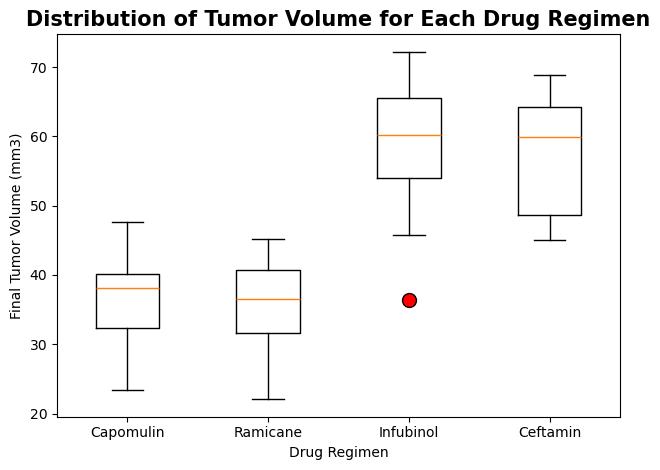

In [14]:
#used Xpert assist and other AI assistance to complete code.  I failed with multiple tries and kept getting the dots in the wrong places.  Still not sure what was wrong.  I do not like box plats. :(

# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume_data, labels=treatments, flierprops=dict(marker='o', markerfacecolor='red', markersize=10))

# Add labels and title
plt.title('Distribution of Tumor Volume for Each Drug Regimen',fontsize=15, weight='bold')
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.tight_layout()

# Show the plot
plt.show()

## Line and Scatter Plots

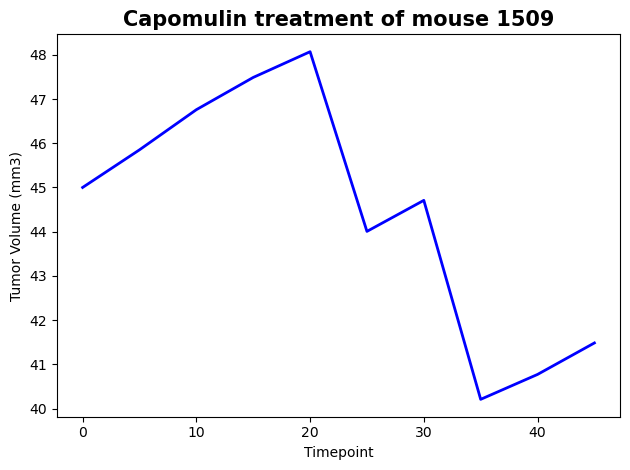

In [15]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_subject = "l509"
single_mouse = clean_mouse_data[clean_mouse_data['Mouse ID'] == mouse_subject]

fig1, ax1 = plt.subplots()
plt.plot(single_mouse['Timepoint'], single_mouse['Tumor Volume (mm3)'], color='blue', linewidth=2)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Capomulin treatment of mouse 1509",fontsize=15, weight='bold')
plt.tight_layout()

plt.show()


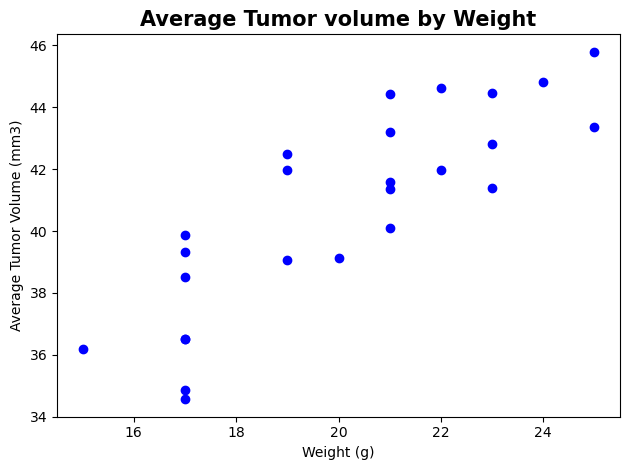

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#used Xpert Assistence to complete code

capomulin_data = clean_mouse_data[clean_mouse_data['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()

# Plot
plt.scatter(mouse_weight, average_tumor_volume, color='blue')
plt.title("Average Tumor volume by Weight", fontsize=15, weight='bold')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.tight_layout()
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


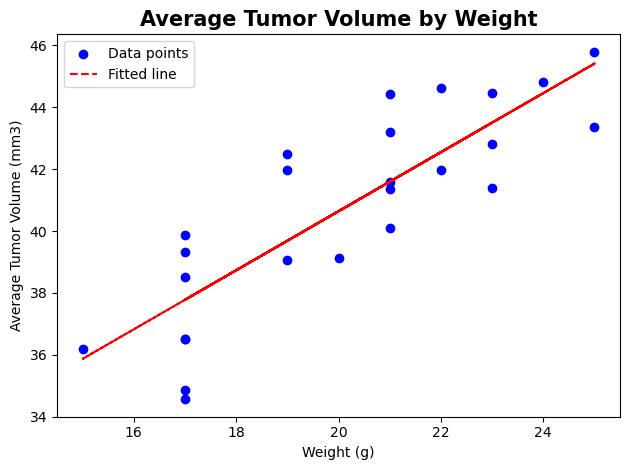

In [24]:
#Used Xpert Assistence to complete code
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


correlation = mouse_weight.corr(average_tumor_volume)


print("The correlation between mouse weight and the average tumor volume is:", round(correlation, 2))


slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, average_tumor_volume)


plt.scatter(mouse_weight, average_tumor_volume, color='b', label='Data points')
plt.plot(mouse_weight, intercept + slope * mouse_weight, 'r--', label='Fitted line')
plt.title("Average Tumor Volume by Weight", fontsize=15, weight='bold')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.tight_layout()

plt.show()
